In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.metrics import silhouette_score, adjusted_rand_score
import random


In [2]:
# Из датасета выберите наиболее важные параметры, характеризующие цель
# исследования и сформируйте из них матрицу X

# df = pd.read_csv('Mall Customer Segmentation Data/Mall_Customers.csv')
# df.drop('CustomerID', axis=1, inplace=True)
# true_label = 'Spending Score (1-100)'
# first_parameter, second_parameter = 1, 2

df = pd.read_csv('Unsupervised Learning on Country Data/Country-data.csv')
df.drop('total_fer', axis=1, inplace=True)
# df.drop('inflation', axis=1, inplace=True)
true_label = 'inflation'
first_parameter, second_parameter = 3, 6

df_true = df[[true_label]]
df = df.drop(true_label, axis=1)

# Проверьте Х на пропуски и закодируйте категориальные данные, если это
# необходимо
for column in df.columns:
    if df.dtypes[column] == 'int64':
        continue
    df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)
X = df.values
print(df)

     country  child_mort  exports  health  imports  income  life_expec   gdpp
0         58        79.0      1.0     9.0     31.0    1610        13.0    553
1         42        14.0     11.0     8.0     35.0    9930        33.0   4090
2         78        89.0    103.0     5.0     17.0   12900        24.0   4460
3         87        99.0      9.0     3.0     29.0    5900        21.0   3530
4        166       108.0    112.0     7.0     45.0   19100        40.0  12200
..       ...         ...      ...     ...      ...     ...         ...    ...
162       38        94.0     86.0    30.0    122.0    2950        24.0   2970
163       45        19.0     42.0    83.0     75.0   16500       105.0  13500
164      163        92.0     68.0   106.0    140.0    4490        94.0   1310
165       43        12.0     43.0    35.0     99.0    4480        72.0   1310
166       26       102.0     85.0   141.0     97.0    3280        10.0   1460

[167 rows x 8 columns]


C:\Users\XoJIo\AppData\Local\Temp\ipykernel_18488\537837547.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)


In [3]:
# Нормализуйте значения в матрице Х функцией MinMaxScaler().
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# print(df)
print(X_normalized)

[[0.34939759 0.57246377 0.00699301 ... 0.00804721 0.11111111 0.00307343]
 [0.25301205 0.10144928 0.07692308 ... 0.07493307 0.28205128 0.03683341]
 [0.46987952 0.64492754 0.72027972 ... 0.0988094  0.20512821 0.04036499]
 ...
 [0.98192771 0.66666667 0.47552448 ... 0.03120001 0.8034188  0.01029885]
 [0.25903614 0.08695652 0.3006993  ... 0.03111961 0.61538462 0.01029885]
 [0.15662651 0.73913043 0.59440559 ... 0.02147261 0.08547009 0.01173057]]


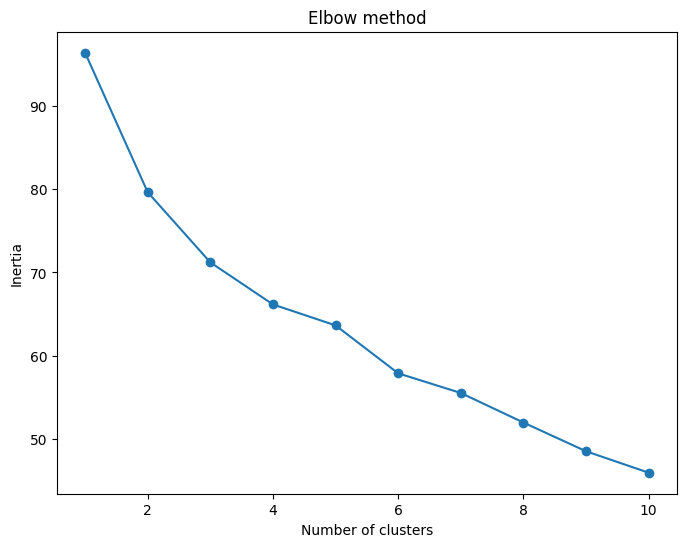

random_state 22
Clusters:
 [2 2 2 2 3 2 0 0 0 2 0 2 0 2 2 2 0 2 0 3 2 0 0 1 1 2 2 2 2 0 0 2 3 1 0 1 2
 2 3 2 2 2 0 2 1 0 2 0 0 3 2 2 2 1 1 2 0 0 1 0 0 1 3 3 2 1 2 1 0 0 0 0 3 3
 1 3 2 3 2 3 0 2 1 1 2 1 3 3 0 3 0 3 1 3 3 1 3 2 3 3 1 0 0 3 3 0 3 3 0 1 1
 1 1 3 3 1 2 0 1 2 3 3 2 1 3 1 0 0 0 3 3 3 2 3 0 1 3 3 0 1 0 0 3 1 1 1 0 2
 1 1 3 3 1 3 1 0 3 3 3 1 1 3 3 1 3 1 3]


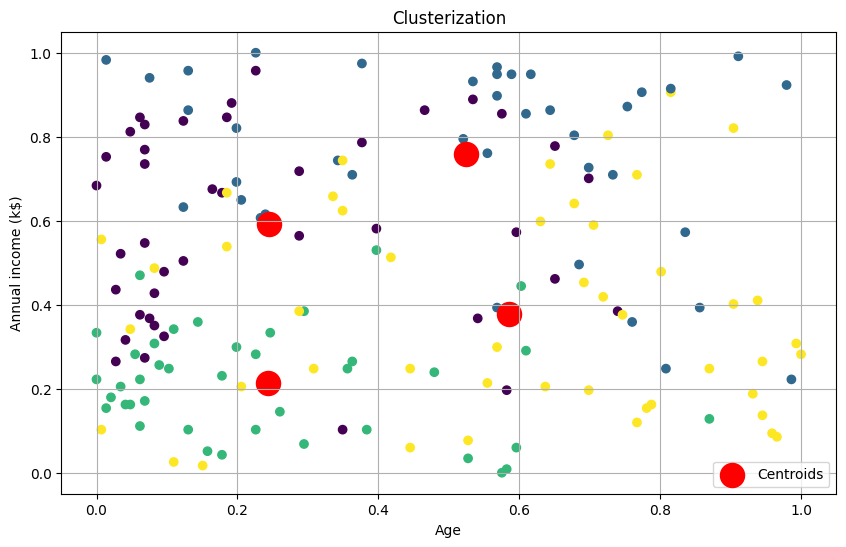

In [6]:
# C помощью метода локтя определите оптимальное количество кластеров и
# разделите данные на кластеры методом K-means.

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, algorithm='lloyd')
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Визуализируйте результаты кластеризации, выбрав для визуализации два
# параметра из матрицы Х

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
k_optimal = 4

random_state = random.randint(0, 100)
random_state = 22
print('random_state', random_state)

kmeans = KMeans(n_clusters=k_optimal, random_state=random_state)
clusters = kmeans.fit_predict(X_normalized)
print("Clusters:\n", clusters)

plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[:, first_parameter], X_normalized[:, second_parameter], c=clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, first_parameter], kmeans.cluster_centers_[:, second_parameter], s=300, c='red', label='Centroids')
plt.title('Clusterization')
plt.xlabel('Age')
plt.ylabel('Annual income (k$)')
plt.legend()
plt.grid(True)
plt.show()


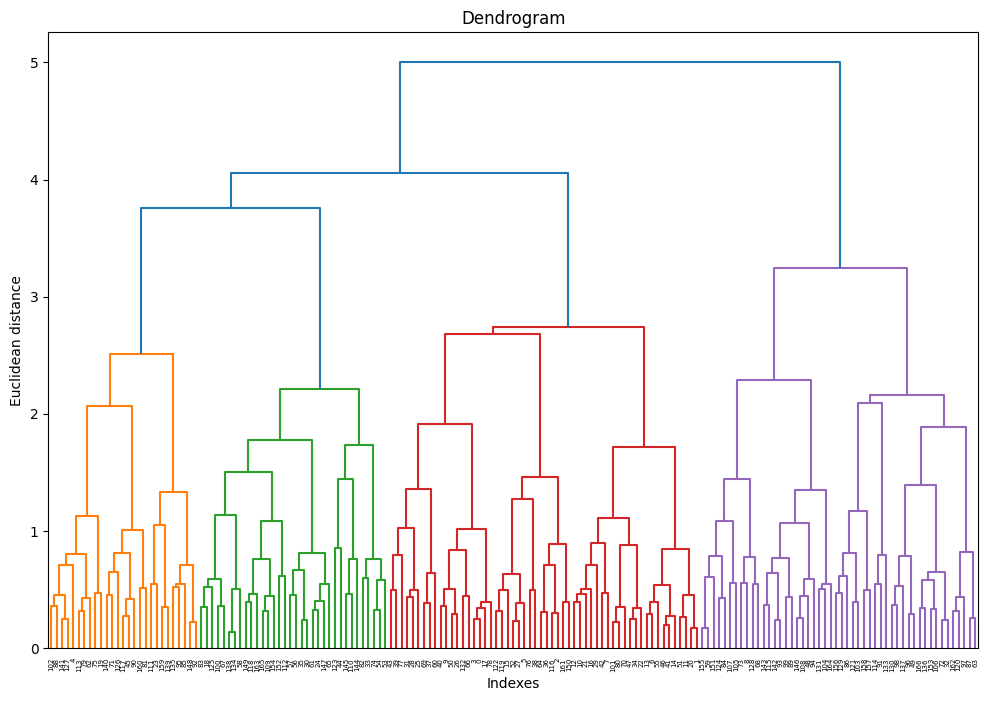

[2 2 2 2 3 3 2 0 0 2 3 3 2 3 2 0 2 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 2 3 2 2 2
 2 2 2 2 3 3 3 0 2 2 2 2 3 2 3 2 0 0 2 2 2 0 2 3 2 2 2 2 2 2 3 0 2 2 2 2 0
 3 0 2 0 2 3 2 2 0 2 2 3 2 2 2 3 3 1 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0
 3 2 2 1 3 2 2 2 2 2 3 3 1 2 3 2 2 3 2 2 3 2 0 3 3 2 2 3 3 2 2 2 2 0 1 2 2
 2 2 2 2 2 3 2 2 2 0 0 0 3 2 2 3 2 2 2]


In [7]:
# Разделите данные на кластеры методом иерархической кластеризации,
# выберите с помощью дендрограммы оптимальное количество кластеров.
# Иерархическая кластеризация
linked = linkage(X_normalized, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Indexes')
plt.ylabel('Euclidean distance')
plt.show()


hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
hc.fit(X)
labels = hc.labels_
print(labels)

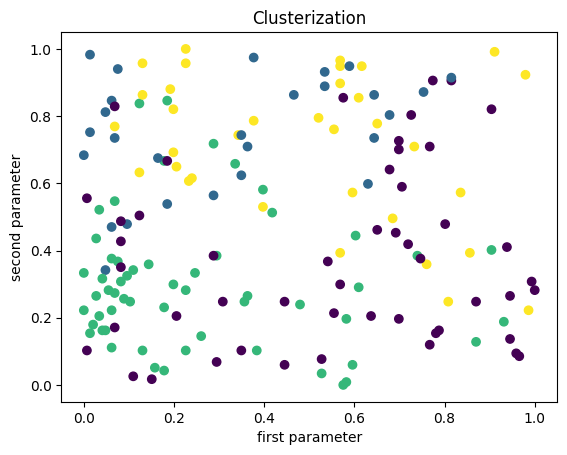

In [9]:
# Визуализируйте результаты кластеризации методом иерархической
# кластеризации
k_optimal_hierarchical = 4

hierarchical_clustering = AgglomerativeClustering(n_clusters=k_optimal_hierarchical, linkage='ward')
y_hc = hierarchical_clustering.fit_predict(X_normalized)

plt.scatter(X_normalized[:, first_parameter], X_normalized[:, second_parameter], c=y_hc, cmap='viridis')
plt.title('Clusterization')
plt.xlabel('first parameter')
plt.ylabel('second parameter')
plt.show()


In [10]:
# Оцените качество кластеризации методами K-means и иерархической
# кластеризации, рассчитав пару метрик качества кластеризации (модуль
# sklearn.metrics). Например, силуэт для выборки silhouette_score() и др
print(X_normalized)
labels_true = np.squeeze(df_true)
silhouette_kmeans = silhouette_score(X_normalized, clusters)
ari_kmeans = adjusted_rand_score(labels_true, clusters)  

silhouette_hierarchical = silhouette_score(X_normalized, y_hc)
ari_hierarchical = adjusted_rand_score(labels_true, y_hc) 

print("Silhouette методом K-means:", silhouette_kmeans)
print("ARI методом K-means:", ari_kmeans)
print("Silhouette методом иерархической кластеризации:", silhouette_hierarchical)
print("ARI методом иерархической кластеризации:", ari_hierarchical)


[[0.34939759 0.57246377 0.00699301 ... 0.00804721 0.11111111 0.00307343]
 [0.25301205 0.10144928 0.07692308 ... 0.07493307 0.28205128 0.03683341]
 [0.46987952 0.64492754 0.72027972 ... 0.0988094  0.20512821 0.04036499]
 ...
 [0.98192771 0.66666667 0.47552448 ... 0.03120001 0.8034188  0.01029885]
 [0.25903614 0.08695652 0.3006993  ... 0.03111961 0.61538462 0.01029885]
 [0.15662651 0.73913043 0.59440559 ... 0.02147261 0.08547009 0.01173057]]
Silhouette методом K-means: 0.1305449131524698
ARI методом K-means: -0.0005615728045552806
Silhouette методом иерархической кластеризации: 0.12038131855058677
ARI методом иерархической кластеризации: 0.00044353038352585537


c:\Users\XoJIo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\XoJIo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


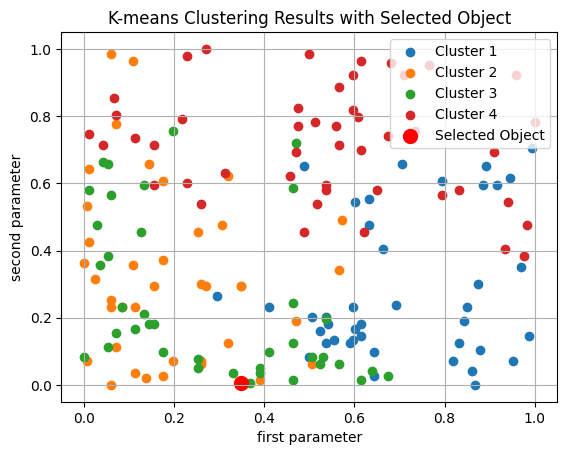

In [11]:
index = 0
cluster_index = kmeans.labels_[index]

feature1_index = 0  
feature2_index = 2 

for cluster in range(k_optimal):
    plt.scatter(X_normalized[kmeans.labels_ == cluster, feature1_index],
                X_normalized[kmeans.labels_ == cluster, feature2_index],
                label=f'Cluster {cluster + 1}')

plt.scatter(X_normalized[index, feature1_index], X_normalized[index, feature2_index],
            color='red', s=100, label='Selected Object')

plt.xlabel('first parameter')
plt.ylabel('second parameter')
plt.title('K-means Clustering Results with Selected Object')
plt.legend()
plt.grid(True)
plt.show()


### 1. Что решают задачи кластеризации в машинном обучении?

Задачи кластеризации в машинном обучении направлены на группировку набора объектов таким образом, чтобы объекты в одной группе (кластере) были более похожи друг на друга, чем на объекты из других групп. Основные цели кластеризации включают:

- Поиск закономерностей
- Сжатие данных
- Обнаружение аномалий

### 2. Расскажите принцип работы метода K-means.

Метод K-means — это алгоритм кластеризации, который разделяет данные на k кластеров следующим образом:

1. **Инициализация:** Выбираются k начальных центроидов (случайно или по какой-то стратегии).
2. **Назначение объектов кластерам:** Каждому объекту данных назначается ближайший центроид, что формирует k кластеров.
3. **Обновление центроидов:** Для каждого кластера вычисляется новый центроид как среднее значение всех объектов, принадлежащих этому кластеру.
4. **Повторение:** Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут изменяться значительно (или пока не достигнется заранее заданное количество итераций).

### 3. Как можно выбрать оптимальное количество кластеров в K-means?

Оптимальное количество кластеров можно выбрать с помощью различных методов, таких как:

- **Метод локтя:** Анализируется график зависимости инерции (сумма квадратов расстояний объектов до центроидов) от числа кластеров. Оптимальным считается количество кластеров, при котором дальнейшее уменьшение инерции становится незначительным, образуя "локоть" на графике.
- **Коэффициент силуэта:** Оценивает, насколько хорошо объекты распределены по кластерам. Высокий коэффициент силуэта указывает на четко разделенные кластеры.
- **Информационный критерий (например, AIC, BIC):** Используется для сравнения моделей и выбора наилучшей модели с учетом количества кластеров и степени их соответствия данным.

### 4. Расскажите принцип работы метода иерархической кластеризации.

Иерархическая кластеризация строит вложенные кластеры, которые могут быть представлены в виде дерева (дендрограммы). Существует два подхода:

- **Агломеративная иерархическая кластеризация (снизу-вверх):** 
  1. Начинается с каждого объекта в качестве отдельного кластера.
  2. На каждом шаге два ближайших кластера объединяются в один.
  3. Процесс продолжается до тех пор, пока все объекты не объединятся в один кластер.
  
- **Дивизивная иерархическая кластеризация (сверху-вниз):** 
  1. Начинается с одного кластера, включающего все объекты.
  2. На каждом шаге кластер делится на два подмножества.
  3. Процесс продолжается до тех пор, пока каждый объект не окажется в отдельном кластере.

### 5. Для чего можно использовать дендрограмму в методе иерархической кластеризации?

Дендрограмма используется для:

- **Визуализации процесса кластеризации:** Показывает, как кластеры объединяются (или разделяются) на каждом шаге.
- **Определения оптимального числа кластеров:** С помощью дендрограммы можно определить, на каком уровне следует "отрезать" дерево для получения оптимального числа кластеров. Это делается путем поиска большого вертикального расстояния между уровнями объединения.

### 6. Какие метрики используют для оценки качества кластеризации?

Для оценки качества кластеризации используются следующие метрики:

- **Коэффициент силуэта:** Измеряет, насколько хорошо каждый объект находится в своем кластере по сравнению с другими кластерами. Диапазон значений от -1 до 1, где 1 — идеально, 0 — объекты на границе кластеров, -1 — неправильная кластеризация.
- **Индекс Дэвиса-Болдина:** Измеряет среднее подобие между каждым кластером и кластером, который наиболее похож на него. Меньшее значение указывает на лучшее качество кластеризации.
- **Скорректированный индекс Рэнда (Adjusted Rand Index):** Оценивает схожесть между двумя различными кластеризациями (например, истинной и предсказанной). ARI скорректирован для случайного совпадения и имеет значение от -1 до 1.
- **Инерция:** Сумма квадратов расстояний от объектов до ближайшего центроида. Меньшее значение указывает на более плотные кластеры.